# Breast Cancer(Wisconsin Dataset)

In this project, I am working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

**Variable Information:**

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
    
    
The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [50]:
import sklearn
sklearn.__version__

'1.0.2'

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
pd.set_option('display.max_columns', 100)

In [54]:
# Your package imports here
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

- Since the dataset at the UCI repository does not have headers, I will read the data from the hard drive which I already modified.
- Last column is the target column.
- The ID column is already dropped.

In [55]:
df = pd.read_csv('wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [56]:
df.columns = ['id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [57]:
df.head()

,id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
X = df.drop(['id', 'diagnosis'], axis=1)

In [59]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [60]:
y = df.diagnosis
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

## Finding out how many people having Cancer

In [61]:
# Assuming y is a pandas Series containing labels
malignant_count = y.value_counts()[1]

print(f"{malignant_count} people have malignant cancer")


212 people have malignant cancer


Finding out the column types and checking is there any categorical data or any missing values.Checking the shape of the dataset.

In [62]:
print(X.isnull().sum())
print("No missing values")
category_columns = X.select_dtypes(include=['category']).columns.tolist()
print("Category columns:", category_columns)
# computing number of rows
rows = len(X.axes[0])
# computing number of columns
cols = len(X.axes[1])
print(rows, "observations")
print(cols, "columns")

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
No missing values
Category columns: []
569 observations
30 columns


### Check the statistical summary of numeric features.Checking whether the variables have values close to each other, or is there large differences?

In [63]:
l=X.describe()
result = l.iloc[:, :10]
result = result.T

In [64]:
print(result)

                        count        mean         std        min        25%  \
mean radius             569.0   14.127292    3.524049    6.98100   11.70000   
mean texture            569.0   19.289649    4.301036    9.71000   16.17000   
mean perimeter          569.0   91.969033   24.298981   43.79000   75.17000   
mean area               569.0  654.889104  351.914129  143.50000  420.30000   
mean smoothness         569.0    0.096360    0.014064    0.05263    0.08637   
mean compactness        569.0    0.104341    0.052813    0.01938    0.06492   
mean concavity          569.0    0.088799    0.079720    0.00000    0.02956   
mean concave points     569.0    0.048919    0.038803    0.00000    0.02031   
mean symmetry           569.0    0.181162    0.027414    0.10600    0.16190   
mean fractal dimension  569.0    0.062798    0.007060    0.04996    0.05770   

                              50%        75%         max  
mean radius              13.37000   15.78000    28.11000  
mean texture

### The variables having very large differences

### Checking the correlation and creating correlaton heatmap. Finding out the largely correlated variables.

In [65]:
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

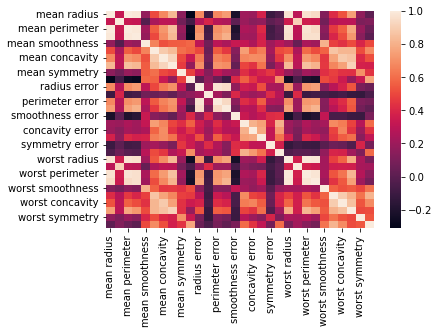

In [66]:
sns.heatmap(X.corr())

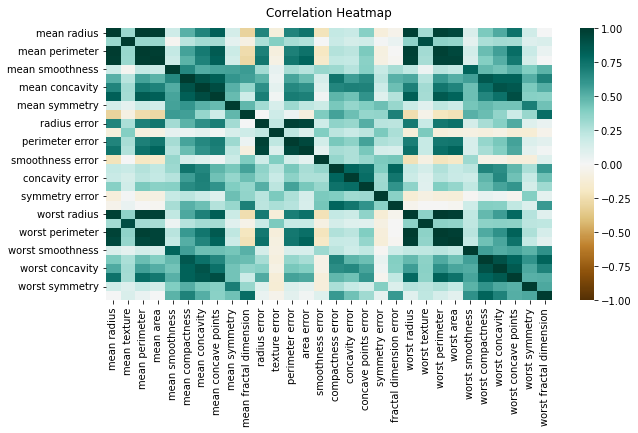

In [67]:
# Increase the size of the heatmap.
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1,cmap='BrBG')
# title to the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### One of the fastest ways to strengthen a model is to identify and reduce the features in the dataset that are highly correlated. It's so difficult to find highly correlated variables from this complex heatmap. So, I am just writing the below snippet to find top 5 absoulte highly correlated variables.
 

In [68]:
import pandas as pd

def get_redundant_pairs(X):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = X.columns
    for i in range(0, X.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(X, n=5):
    au_corr = X.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(X)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X, 5))

Top Absolute Correlations
mean radius     mean perimeter     0.997855
worst radius    worst perimeter    0.993708
mean radius     mean area          0.987357
mean perimeter  mean area          0.986507
worst radius    worst area         0.984015
dtype: float64


### Train - Test split 
#### Finding out the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
#### Implementing the Startified Sampling. What is the reason for that.

In [69]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [70]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [71]:
y = lb.fit_transform(y).ravel()

In [72]:
y = pd.Series(y)

In [73]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32

In [74]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [75]:
y_train.value_counts(normalize=True)

0    0.626761
1    0.373239
Name: proportion, dtype: float64

In [76]:
y_test.value_counts(normalize=True)

0    0.629371
1    0.370629
Name: proportion, dtype: float64

Stratified random sampling ensures that the splits keep their proportion of targets values. This is important to stay consistent with the data collected.

### This is a binary classification problem. Implementing the Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
## Initiate the model
clf = LogisticRegression(max_iter = 10000, C=0.1)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score


# Fit on training data 
clf.fit(X_train, y_train)

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Training accuracy
train_acc = accuracy_score(y_train, clf.predict(X_train)) 

# Testing accuracy
test_acc = accuracy_score(y_test, y_pred)

# Create confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cnf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
fpr = 1 - specificity
f1 = f1_score(y_test, y_pred)
print("confusion matrix :\n" , cnf_matrix)
print("Training Accuracy:", train_acc) 
print("Testing Accuracy:", test_acc)
print("recall:" , recall)
print("specifity:" , specificity)
print("precision:" , precision)
print("false positive rate:",fpr )
print("F1score:" , f1)

confusion matrix :
 [[89  1]
 [ 1 52]]
Training Accuracy: 0.9413145539906104
Testing Accuracy: 0.986013986013986
recall: 0.9811320754716981
specifity: 0.9888888888888889
precision: 0.9811320754716981
false positive rate: 0.011111111111111072
F1score: 0.9811320754716981


### Implementing the KNN Classifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [81]:
clf = KNeighborsClassifier(n_neighbors=1)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Initiate model
knn = KNeighborsClassifier(n_neighbors=1)

# Fit on training data
#X_train = [training_data_placeholder]   
#y_train = [training_labels_placeholder]
clf.fit(X_train, y_train) 

# Make predictions on testing data 
#X_test = [testing_data_placeholder]
y_pred = clf.predict(X_test)

# Training accuracy
train_acc = accuracy_score(y_train, clf.predict(X_train))

# Testing accuracy
test_acc = accuracy_score(y_test, y_pred)  

# Create confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)  
# Extract values from the confusion matrix
tn, fp, fn, tp = cnf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
fpr = 1 - specificity
f1 = f1_score(y_test, y_pred)

print("Training Accuracy:", train_acc) 
print("Testing Accuracy:", test_acc)
print("recall:" , recall)
print("specifity:" , specificity)
print("precision:" , precision)
print("false positive rate:",fpr )
print("F1score:" , f1)

Training Accuracy: 1.0
Testing Accuracy: 0.9440559440559441
recall: 0.9245283018867925
specifity: 0.9555555555555556
precision: 0.9245283018867925
false positive rate: 0.0444444444444444
F1score: 0.9245283018867925


### Trying with different C values. C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]. for logistic regression. Creating a validation curve for train and test accuracies.

Training Accuracies: [0.9248826291079812, 0.931924882629108, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347, 0.9413145539906104, 0.9413145539906104, 0.9460093896713615, 0.9483568075117371, 0.9507042253521126, 0.9624413145539906, 0.9694835680751174, 0.9788732394366197, 0.9835680751173709, 0.9882629107981221, 0.9882629107981221, 0.9882629107981221, 0.9882629107981221, 0.9882629107981221]
Testing Accuracies: [0.9370629370629371, 0.958041958041958, 0.9790209790209791, 0.972027972027972, 0.972027972027972, 0.9790209790209791, 0.986013986013986, 0.993006993006993, 0.993006993006993, 0.993006993006993, 0.9790209790209791, 0.986013986013986, 0.993006993006993, 0.986013986013986, 0.986013986013986, 0.986013986013986, 0.9790209790209791, 0.972027972027972, 0.972027972027972]


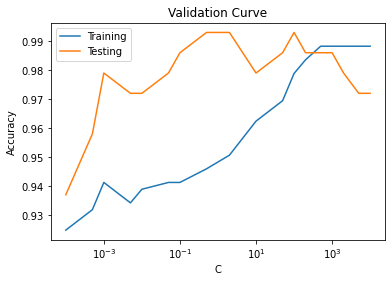

In [83]:
import matplotlib.pyplot as plt

C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

train_accs = []
test_accs = []

for c in C_list:
    clf = LogisticRegression(C=c,max_iter=10000)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred) 
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

print("Training Accuracies:", train_accs)
print("Testing Accuracies:", test_accs)

# Plot validation curve
plt.plot(C_list, train_accs, label="Training")
plt.plot(C_list, test_accs, label="Testing")
#plt.scatter(C_list, train_accs, label="Training", marker='o')
#plt.scatter(C_list, test_accs, label="Testing", marker='o')
plt.xscale("log")
plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Validation Curve")
plt.show()

###  Trying with different C values K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49] for KNN Classifier.Creating a validation Curve for training and test accuracies for each K  value.

Training Accuracies: [1.0, 0.9483568075117371, 0.9460093896713615, 0.9389671361502347, 0.931924882629108, 0.9248826291079812, 0.9272300469483568, 0.9248826291079812, 0.9225352112676056, 0.9225352112676056, 0.9225352112676056, 0.9131455399061033, 0.9084507042253521]
Testing Accuracies: [0.9440559440559441, 0.965034965034965, 0.9370629370629371, 0.9440559440559441, 0.9370629370629371, 0.9440559440559441, 0.9440559440559441, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9300699300699301, 0.9230769230769231, 0.9300699300699301]


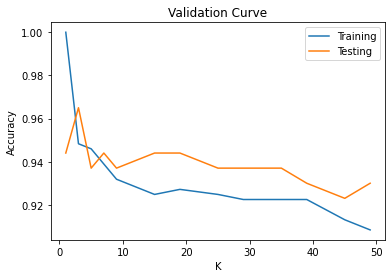

In [84]:
import matplotlib.pyplot as plt

K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49] 

train_accs = []
test_accs = []

for k in K_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train) 
    y_test_pred = knn.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

print("Training Accuracies:", train_accs)
print("Testing Accuracies:", test_accs)


plt.plot(K_list, train_accs, label="Training")
plt.plot(K_list, test_accs, label="Testing")
plt.legend()
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Validation Curve")
plt.show()

### The validation curve for logistic regression looking little bit different.That might have to do with the fact that the data is not normalized.
##### Applying Standardization
#### Trying with different C values C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
##### plotting the curves

In [85]:
from sklearn import preprocessing

In [86]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

Training Accuracies: [0.6455399061032864, 0.8356807511737089, 0.8849765258215962, 0.9460093896713615, 0.9483568075117371, 0.9788732394366197, 0.9835680751173709, 0.9906103286384976, 0.9906103286384976, 0.9929577464788732, 0.9929577464788732, 0.9929577464788732, 0.9929577464788732, 0.9953051643192489, 0.9976525821596244, 0.9976525821596244, 1.0, 1.0, 1.0]
Testing Accuracies: [0.6363636363636364, 0.8671328671328671, 0.9300699300699301, 0.965034965034965, 0.965034965034965, 0.9790209790209791, 0.986013986013986, 0.986013986013986, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.965034965034965, 0.965034965034965, 0.965034965034965]


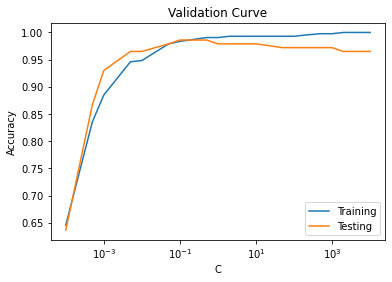

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt

C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

train_accs = []
test_accs = []

for c in C_list:
    clf = LogisticRegression(C=c)
    clf.fit(X_train_ss, y_train)
    
    y_train_pred = clf.predict(X_train_ss)
    y_test_pred = clf.predict(X_test_ss)
    
    train_acc = accuracy_score(y_train, y_train_pred) 
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

print("Training Accuracies:", train_accs)
print("Testing Accuracies:", test_accs)

# Plot validation curve
plt.plot(C_list, train_accs, label="Training")
plt.plot(C_list, test_accs, label="Testing")
plt.xscale("log")
plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Validation Curve")
plt.show()

From this graph I can choose C=0.1 as a best value.

### Running the logistic regression model with Choosen C best value and plotting the learning curve

In [88]:
X_train_ss.shape

(426, 30)

In [89]:
# list(range(1, X_train_ss.shape[0]))
n=1
X_train_ss[0:n,:]

array([[-0.50323613,  1.73953408, -0.44053352, -0.49664617,  0.53358854,
         0.59839524,  0.25384105, -0.07259947,  0.47589812,  0.94655516,
         0.01943197,  1.10918571, -0.08331186, -0.11344568,  0.73341644,
         0.68332997,  0.17965816,  0.26900086, -0.2116796 ,  0.6599449 ,
        -0.12918496,  2.17946516, -0.1622508 , -0.19511526,  1.9967161 ,
         1.31027091,  0.79584853,  0.47330699,  0.45100311,  1.90561739]])

In [90]:
y_train

193    1
543    0
255    1
142    0
330    1
      ..
167    1
73     1
366    1
245    0
239    1
Length: 426, dtype: int32

In [91]:
accuracy_train = []
accuracy_test = []
for n in range(10, X_train_ss.shape[0]):
    clf = LogisticRegression(max_iter = 100, solver='lbfgs', penalty='l2', C=0.1, verbose=0)
    clf.fit(X_train_ss[0:n,:], y_train[0:n])
    pred_trn = clf.predict(X_train_ss[0:n,:])
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:n], y_pred = pred_trn))
    pred_tst = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_tst))

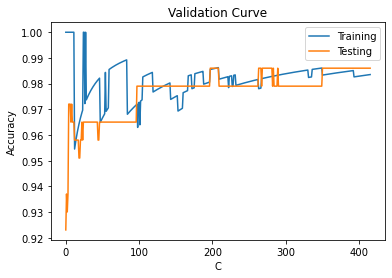

In [92]:
plt.plot(accuracy_train, label="Training")
plt.plot(accuracy_test, label="Testing")
plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Validation Curve")
plt.show()

Initially  there are no datapoints in the training dataset, After multiple iterations training dataset will accumulate more datapoints . So, once the more datapoints are trained by the model which leads to good accuracy for both train and test dataset.Approximately after 220 iterations the model is performing well.

 ### I am trying with the other two ML models for this dataset to increase the accuracy.

## Implementing Decision tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9415204678362573


## Implementing SVM

In [94]:
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


### Printing accuracies for all Models

#### Accuracy for logistic regression :98.60
#### Accuracy for K means : 94.40
#### Accuracy for Decision Tree: 94.73
#### Accuracy for SVM : 96.49

### BY checking all the  testing accuracies for all the models , Logistic regression is performing very well when compared to other models for this dataset